# Datenanalyse mit KI & Machine Learning
## Einfache lineare Regression

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [84]:
# So könnte eine lineare Regression ablaufen:
# https://miro.medium.com/v2/resize:fit:828/1*nhGPRU12caIw7NK5Rr3p-w.gif
# Quelle: https://medium.com/swlh/from-animation-to-intuition-linear-regression-and-logistic-regression-f641a31e1caf

## Datensatz in X und y einteilen

In [5]:
taxis = sns.load_dataset("taxis")
taxis.head(23)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.00,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.00,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.00,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.00,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.00,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.00,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.40,8.5,0.00,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.00,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.00,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


In [6]:
# Definieren der Modellvariablen
# X - unabhängige Variable(n), mit denen wir Vorhersagen treffen
# y - abhängige Variable, die wir vorhersagen wollen
X = taxis[['distance']]
y = taxis['total']

In [7]:
X  # Datentyp: DataFrame

,distance
0,1.60
1,0.79
2,1.37
3,7.70
4,2.16
...,...
6428,0.75
6429,18.74
6430,4.14
6431,1.12


In [8]:
y  # Datentyp Series

0       12.95
1        9.30
2       14.16
3       36.95
4       13.40
        ...  
6428     6.36
6429    58.80
6430    17.30
6431     6.80
6432    20.16
Name: total, Length: 6433, dtype: float64

## Einfaches Splitten der Daten in train und test

In [9]:
# Parameter random_state, wenn Reproduzierbarkeit gewünscht ist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [90]:
X_train

,distance
5079,1.36
2789,1.49
5489,1.90
5258,1.57
115,0.65
...,...
3093,1.20
1312,3.79
5484,3.00
445,1.30


In [91]:
X_test

,distance
5880,1.28
5587,10.10
4761,1.86
5178,14.04
5850,1.87
...,...
4043,0.55
4155,0.80
6052,1.45
3950,8.77


In [92]:
y_test

5880    11.30
5587    31.80
4761    12.74
5178    62.57
5850    12.55
        ...  
4043     9.36
4155     9.30
6052    10.80
3950    33.30
1483    12.25
Name: total, Length: 1287, dtype: float64

## Split in Trainings-, Validierungs- und Testdatensatz

In [10]:
# Die Datengrundlage für die Regression:
X = taxis[['distance']]
y = taxis['total']

In [11]:
# Erzeugen von Trainingsdaten und temporären Daten (zum Weitersplitten)
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.1

# Erzeugen Trainingsdatensatz und von temp-Datensatz zum Weitersplitten:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_ratio)

In [12]:
# Verhältnis zum Splitten von Temp:
test_size = test_ratio / (validation_ratio + test_ratio)
# Aufsplitten von temp-Datensatz in Test- und Validierungsdaten:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size)

In [13]:
print(len(X_train)/len(X))
print(len(X_val)/len(X))
print(len(X_test)/len(X))

0.7498834136483755
0.15000777242344163
0.10010881392818281


In [15]:
# Hat unser Split funktioniert?
alle_daten = len(X)
print(f"Der Trainingsdatensatz enthält {len(X_train) / alle_daten:.1%} der Daten.")
print(f"Der Validierungsdatensatz enthält {len(X_val) / alle_daten:.1%} der Daten.")
print(f"Der Testdatensatz enthält {len(X_test) / alle_daten:.1%} der Daten.")
# Alternativ shape[0]

Der Trainingsdatensatz enthält 75.0% der Daten.
Der Validierungsdatensatz enthält 15.0% der Daten.
Der Testdatensatz enthält 10.0% der Daten.


## Einfache lineare Regression

### Wird verwendet, wenn nur eine x-Variable für Regression genutzt wird

#### Hier: Können wir nur mit der distance Variable voraussagen, wie teuer unsere Taxifahrt wird?

In [16]:
# Modelltyp definieren
model = LinearRegression()

# Berechnung der Parameter
model.fit(X=X_train.values, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Koeffizient von distance:
print('Koeffizient von distance:', model.coef_.item())

# Y-Achsenabschnitt:
print('Y-Achsenabschnitt:', model.intercept_)

Koeffizient von distance: 3.235062674693609
Y-Achsenabschnitt: 8.736786431543875


In [19]:
# Nur so nebenher als Alternative zur Schreibweise darunter ;)
taxis.query('distance == 0')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


In [20]:
taxis[taxis['distance'] == 0]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


### Ausgangsgleichung:
$y = b * x + a$

#### Interpretation:
a = 8.57 = Bei einer Distanz von 0 Meilen Fahrtstrecke beträgt der Rechnungsbetrag 8.57 Dollar.
--> ACHTUNG: INTERCEPT NICHT IMMER INTERPRETIERBAR! Nur dann, wenn unsere X-Variablen sich bis 0 erstrecken, kann der Intercept logisch interpretiert werden.

b = 3.29 = Steigt die Distanz um 1, steigt der Rechnungsbetrag um 3.29; Anders formuliert: Pro km Fahrstrecke zahlen wir 3.29$ mehr.

### Regression können wir jetzt visualisieren

In [21]:
# Maximal- und Minimalwert unserer X_Daten herausfinden
min_X_train = min(X_train['distance'])
max_X_train = max(X_train['distance'])
print(min_X_train)
print(max_X_train)

0.0
36.66


In [22]:
a = model.coef_.item()
b = model.intercept_
print(a)
print(b)

3.235062674693609
8.736786431543875


### Nur zur Demonstration!
#### Händisch mit der ermittelten Geradengleichung rechnen (**so wird das _nicht_ gemacht**):

In [24]:

min_y_pred = a*min_X_train + b
print(min_y_pred)

8.736786431543875


In [25]:
max_y_pred = a*max_X_train + b
print(max_y_pred)

127.33418408581157


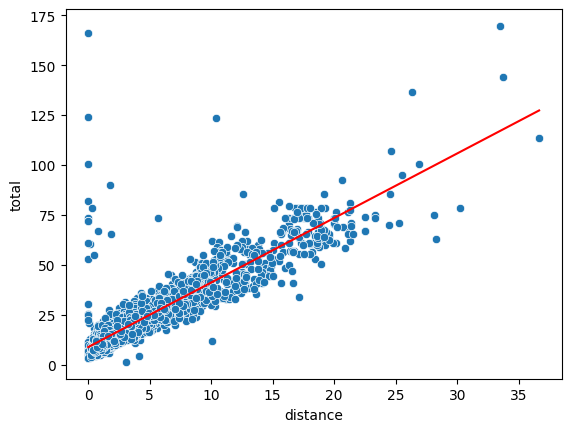

In [26]:
# Scatterplot erstellen mit Punkten aus Trainingsdatensatz und Regressionsgeraden
sns.scatterplot(x=X_train['distance'], y=y_train)
plt.plot([min_X_train, max_X_train], [min_y_pred, max_y_pred], color='red');

In [107]:
# Auf eigene Gefahr auskommentieren ;)
# list(zip([min_X_train, max_X_train], [min_y_pred, max_y_pred]))

In [27]:
# Mithilfe von Modell Vorhersagen für maximalen und minimalen Wert von X erstellen
# So macht man das mit den Vorhersagewerten dann in der Praxis:
predictions = model.predict([[min_X_train], [max_X_train]])
predictions

array([  8.73678643, 127.33418409])

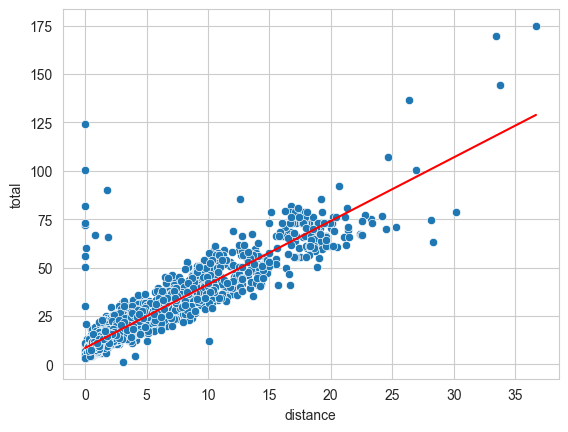

In [109]:
sns.scatterplot(x=X_train['distance'], y=y_train)
plt.plot([min_X_train, max_X_train], predictions, color='red');

In [28]:
# Wie gut beschreibt unser Modell unsere Trainingsdaten? >>> R²
model.score(X_train.values, y_train)

0.8013994860144378

In [29]:
# Viel wichtiger: Wie gut beschreibt unser Modell unsere Validierungsdaten?
model.score(X_val.values, y_val)

0.8652001189400155

In [112]:
# Unser Modell beschreibt unsere Variable schon ziemlich gut!

# Alternativ: mit statsmodel

In [113]:
# Konstante in Modell festlegen
X_with_constant = sm.add_constant(X_train['distance'])

# Modell erstellen
model_OLS = sm.OLS(y_train, X_with_constant)
result = model_OLS.fit()

In [114]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.600e+04
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:18:20   Log-Likelihood:                -15019.
No. Observations:                4824   AIC:                         3.004e+04
Df Residuals:                    4822   BIC:                         3.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4967      0.100     85.215      0.000       8.301       8.692
distance       3.2800      0.020    161.252      0.000       3.240       3.320
==============================================================================
Omnibus:                     5900.166   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1891118.003
Skew:                           6.210   Prob(JB):                         0.00
Kurtosis:                      99.199   Cond. No.                         6.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Wann sollten wir statsmodels und wann sklearn verwenden?


#### Statsmodels ist besser für Statistische Auswertungen geeignet, sklearn ist spezialisiert auf Machine Learning, also auf Vorhersagen.

# Übungsaufgabe

### Lade den healthexp-Datensatz aus Seaborn und führe mit sklearn eine einfache lineare Regression durch. Die abhängige Variabel soll dabei die Spalte Life_Expectancy sein. Erstelle je ein Modell, in dem du nur die Spending_USD als unabhängige Variable nutzt und ein anderes Modell, in dem du nur die Spalte Year als unabhängige Variable nutzt.
### Vergleiche am Ende die Scores deiner beiden Modelle.

### Welche Lebenserwartung wird uns im Jahr 2040 vorausgesagt?
### Welche Lebenserwartung wird uns für 3000 Dollar vorhergesagt?

## Mit Year

In [115]:
health = sns.load_dataset("healthexp")
health.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [116]:
X = health[["Year"]]
y = health["Life_Expectancy"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [118]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [119]:
model.score(X=X_train, y=y_train)

0.8058100703541431

In [120]:
model.score(X=X_test, y=y_test)

0.8437402291188079

In [121]:
year2040 = pd.DataFrame({'Year':[2040]})

In [122]:
model.predict(year2040)

array([86.87580798])

In [123]:
print(f"Wird werden circa {model.predict(year2040).item():.0f} Jahre alt sein!")

Wird werden circa 87 Jahre alt sein!


## Mit Spending_USD

In [124]:
X = health[["Spending_USD"]]
y = health["Life_Expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = LinearRegression()
model.fit(X=X_train, y=y_train)
print(model.score(X=X_train, y=y_train))
print(model.score(X=X_test, y=y_test))

0.32204255539081683
0.38378331918921416


In [125]:
salary3000 = pd.DataFrame({'Spending_USD':[3000]})
model.predict(salary3000)

array([78.11322591])

In [126]:
print(f"Wird werden ein Alter von circa {model.predict(salary3000).item():.0f} erreichen!")

Wird werden ein Alter von circa 78 erreichen!


## Lässt sich R² bei Taxis steigern? Versuch mit mehr Variablen in X!

In [127]:
# Heute nur zur Demo. So greift man sich alle numerischen Spalten auf einen Schlag:
taxis.select_dtypes('number')

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36
6429,1,18.74,58.0,0.00,0.0,58.80
6430,1,4.14,16.0,0.00,0.0,17.30
6431,1,1.12,6.0,0.00,0.0,6.80


In [128]:
X = taxis[['distance', 'fare', 'passengers']]
y = taxis['total']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [130]:
# Mit Method Chaining (Methoden-Verkettung)
lin_model  = LinearRegression().fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.950216812065652

In [131]:
# R²-Steigerung von 0.89 auf 0.95!

In [132]:
# Mit allen numerischen Spalten
X = taxis.select_dtypes('number').drop('total', axis=1)
y = taxis['total']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [134]:
# Mit Method Chaining (Methoden-Verkettung)
lin_model  = LinearRegression().fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.9940581424091566

# Übungsaufgabe

### Nutze nun zwei Variablen: Welche Lebenserwartung wird uns im Jahr 2040 mit Year und Spending_USD vorausgesagt?

In [135]:
X = health[["Year", "Spending_USD"]]
y = health["Life_Expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = LinearRegression()
model.fit(X=X_train, y=y_train)
print(model.score(X=X_train, y=y_train))
print(model.score(X=X_test, y=y_test))

0.8983752977980668
0.9092351642700232


In [136]:
year_and_salary = pd.DataFrame({'Year': [2040], 'Spending_USD': [3000]})
year_and_salary

,Year,Spending_USD
0,2040,3000


In [137]:
model.predict(year_and_salary)

array([91.12068657])